# Interactive Python using jupyter notebooks

- Notebooks are made of a sequence of cells
- Cells can contain different content such as Python code, or Markdown
- You can change the cell type in the toolbar
- To execute a cell press "Shift+Return"
- Use the tool bar to add, delete, copy, or insert cells

(Note: to learn more about Markdown check [Daring Fireball's website](https://daringfireball.net/projects/markdown/syntax))

## Import the Python package for numerical arrays (numpy)

In [2]:
import numpy as np

## Define a function that creates some statistical data

In [4]:
def load_data():    
    # Goalkeeper, defender, midfielder, attacker
    possible_positions = ['GK', 'D', 'M', 'A']
    N = 100
    positions = []
    heights = []
    for i in range(0,N):
        positions.append(possible_positions[np.random.randint(len(possible_positions))])
        heights.append(np.random.normal(loc=180.0,scale=5.0))
    return positions, heights

## Read the data

In [6]:
positions, heights = load_data()

The objects ```positions``` and ```heights``` are lists as we can check using the Python function ```type```:

In [8]:
print(type(positions))
print(type(heights))

<class 'list'>
<class 'list'>


Question: *How many items are inside the lists ```positions``` and ```heights```?

Hint: Use the Python function ```len```. 

In [14]:
no_pos = len(positions)
no_hei = len(heights)
print('Items in positions: ', no_pos)
print('Items in heights: ', no_hei)

Items in positions:  100
Items in heights:  100


## Convert to numpy arrays

In [16]:
np_positions = np.array(positions)
np_heights = np.array(heights)

Question: *what is the data type of ```np_positions``` and ```np_heights```*?<br>
Question: *what is the shape of ```np_positions``` and ```np_heights```*?


Hint: Numpy objects have member functions called ```dtype``` and ```shape```.

In [24]:
dt_pos = np_positions.dtype
dt_hei = np_heights.dtype
sh_pos = np_positions.shape
sh_hei = np_heights.shape
print('data type and shape of positions: ', dt_pos, sh_pos)
print('data type and shape of heights: ', dt_hei, sh_hei)

data type and shape of positions:  <U2 (100,)
data type and shape of heights:  float64 (100,)


## Extract the heights of the goalkeepers

In [60]:
gk_heights = np_heights[np_positions == 'GK']
gk_heights.shape

(19,)

## Print the median of the goalkeepers heights

In [28]:
print("Median height of goalkeepers: " + str(np.median(gk_heights)))

Median height of goalkeepers: 178.8118056208655


Question: *what is the median height of all the field players*?<br>
Question: *what is the median height of all the attackers*?<br>
Question: *what is the median height of goalkeepers and the attackers combined?*

In [30]:
np_positions

array(['GK', 'GK', 'D', 'GK', 'M', 'A', 'D', 'A', 'D', 'A', 'GK', 'D',
       'A', 'A', 'GK', 'GK', 'M', 'A', 'A', 'D', 'A', 'D', 'D', 'M', 'D',
       'D', 'M', 'M', 'M', 'M', 'M', 'D', 'A', 'M', 'M', 'M', 'D', 'A',
       'D', 'GK', 'D', 'D', 'D', 'GK', 'M', 'GK', 'GK', 'D', 'A', 'A',
       'D', 'M', 'GK', 'M', 'M', 'GK', 'M', 'D', 'A', 'GK', 'GK', 'D',
       'D', 'A', 'A', 'A', 'GK', 'GK', 'M', 'A', 'A', 'M', 'M', 'A', 'M',
       'GK', 'A', 'A', 'M', 'M', 'M', 'M', 'M', 'GK', 'GK', 'D', 'A', 'D',
       'M', 'A', 'A', 'M', 'A', 'M', 'A', 'A', 'A', 'D', 'M', 'M'],
      dtype='<U2')

In [64]:
attack_heights = np_heights[np_positions == 'A']
defence_heights = np_heights[np_positions == 'D']
midfield_heights = np_heights[np_positions == 'M']

field_heights = np.concatenate((attack_heights, defence_heights, midfield_heights))
field_heights.shape

field_median = np.median(field_heights) 
attack_median = np.median(attack_heights)

print('Median height of field players: ', field_median)
print('Median height of attack players: ', attack_median)


Median height of field players:  179.16737603149392
Median height of attack players:  177.71928806285393


## More statistical tests

Besides the ```median```, numpy als comes with the functions ```mean```, ```std```, ```min``` and ```max``` which are useful for investigating statistical data. 

Question: *Who is the shortest player (which position)*?<br>
Question: *Who is the tallest player (which position)*?

In [74]:
shortest_GK = np.min(gk_heights)
shortest_A = np.min(attack_heights)
shortest_M = np.min(midfield_heights)
shortest_D = np.min(defence_heights)

shortest = np.array([shortest_GK,shortest_A,shortest_M,shortest_D])

print('Shortest GK, A, M, D: ', shortest_GK,shortest_A,shortest_M,shortest_D)
print('Shortest player: ', np.min(shortest))

tallest_GK = np.max(gk_heights)
tallest_A = np.max(attack_heights)
tallest_M = np.max(midfield_heights)
tallest_D = np.max(defence_heights)

print('Tallest GK, A, M, D: ', tallest_GK,tallest_A,tallest_M,tallest_D)

Shortest GK, A, M, D:  171.04002672411318 169.66338114057078 170.51894371343073 168.90030946111384
Shortest player:  168.90030946111384
Tallest GK, A, M, D:  192.56133876425613 187.80983271706677 187.4522370673611 188.0428460647155


## Data plotting

For plotting, we need the package matplotlib

In [76]:
import matplotlib.pyplot as plt

There are different display modes for matplotlib plots inside a jupyter notebook.

In [86]:
# For inline plots use
%matplotlib inline

In [80]:
# For inline plots with interactive capabilities use
%matplotlib notebook

Lets visualize the height distribution of the defenders

In [82]:
d_heights = np_heights[np_positions == 'D']

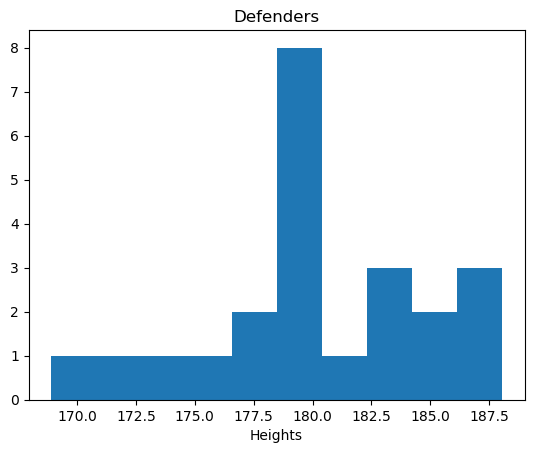

In [88]:
plt.figure()
plt.hist(d_heights)
plt.title('Defenders')
plt.xlabel('Heights')
plt.show()

To figure out the tallest/shortest player, we can the max/min within each position

In [90]:
p = ['GK', 'D', 'M', 'A']
p_max = [np_heights[np_positions == i].max() for i in p]

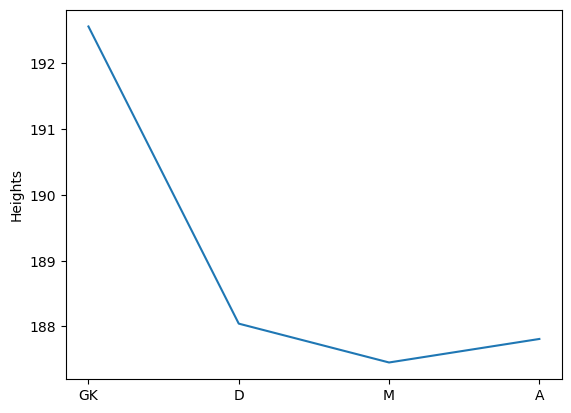

In [92]:
plt.figure()
plt.plot(range(len(p)), p_max)
plt.gca().xaxis.set_ticks(range(len(p)))
plt.gca().xaxis.set_ticklabels(p)
plt.ylabel('Heights')
plt.show()

For inspiration on data plotting and more examples, check out the matplotlib gallery: [https://matplotlib.org/gallery.html](https://matplotlib.org/gallery.html)